In [64]:
# Import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
# Read the dataset
dataset = pd.read_csv('Autism data.csv')

In [66]:
# Understaning the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jundice          704 non-null    object
 14  austim           704 non-null    object
 15  contry_of_res    704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

In [67]:
# 1) no null values are present
# 2) I only need to perform encoding in many columns

In [68]:
dataset

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7,'18 and more',Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3,'18 and more',Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7,'18 and more',?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,'South Asian',no,no,Pakistan,no,6,'18 and more',Self,NO


In [69]:
dataset['ethnicity'].unique()

array(['White-European', 'Latino', '?', 'Others', 'Black', 'Asian',
       "'Middle Eastern '", 'Pasifika', "'South Asian'", 'Hispanic',
       'Turkish', 'others'], dtype=object)

In [70]:
dataset['ethnicity'].value_counts()

White-European       233
Asian                123
?                     95
'Middle Eastern '     92
Black                 43
'South Asian'         36
Others                30
Latino                20
Hispanic              13
Pasifika              12
Turkish                6
others                 1
Name: ethnicity, dtype: int64

In [71]:
dataset['ethnicity'] = dataset['ethnicity'].replace(to_replace="'Middle Eastern'",value = 'Middle Eastern')
dataset['ethnicity'] = dataset['ethnicity'].replace(to_replace="'South Asian'",value = 'South Asian')

In [72]:
ethmap = {'White-European':0, 'Asian':1, 'Middle Eastern':2,
         'Black':3, 'South Asian':4, 'Others':5, 'Latino': 6,
          'Hispanic':7, 'Pasifika':8, 'Turkish':9, 
          'others':5, '?': 0}
# Now I've performed encoding and for the category '?' I've used the value same 0 which is the value of white european
# this is a per frequency encoding technique for '?'
dataset['ethnicity'] = dataset['ethnicity'].map(ethmap)

In [73]:
dataset

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,0.0,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,6.0,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,6.0,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,0.0,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,0.0,no,no,Egypt,no,2,'18 and more',?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,0.0,no,no,Russia,no,7,'18 and more',Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,7.0,no,no,Mexico,no,3,'18 and more',Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,0.0,no,no,Russia,no,7,'18 and more',?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,4.0,no,no,Pakistan,no,6,'18 and more',Self,NO


In [74]:
dataset['ethnicity'].value_counts()

0.0    328
1.0    123
3.0     43
4.0     36
5.0     31
6.0     20
7.0     13
8.0     12
9.0      6
Name: ethnicity, dtype: int64

In [75]:
dataset = dataset.fillna(2)

In [76]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [77]:
# Now the categories gender, jundice and austim conatins only yes and no or f and m (for gender)
# I'll simply perform labelencoding
dataset['gender'] = lb.fit_transform(dataset['gender'])
dataset['jundice'] = lb.fit_transform(dataset['jundice'])
dataset['austim'] = lb.fit_transform(dataset['austim'])

In [78]:
dataset['age_desc'].value_counts()

'18 and more'    704
Name: age_desc, dtype: int64

In [79]:
# Now I'll simply drop the column country as I've already taken ethnicity into consideration 
# used_app_before and relation columns are also of no use to make the desired prediction
# age_desc column shows all patients are 18+ so no variety in the column so we'll remove it as well
dataset = dataset.drop({'contry_of_res', 'used_app_before', 'age_desc', 'relation', 'age'}, axis=1)

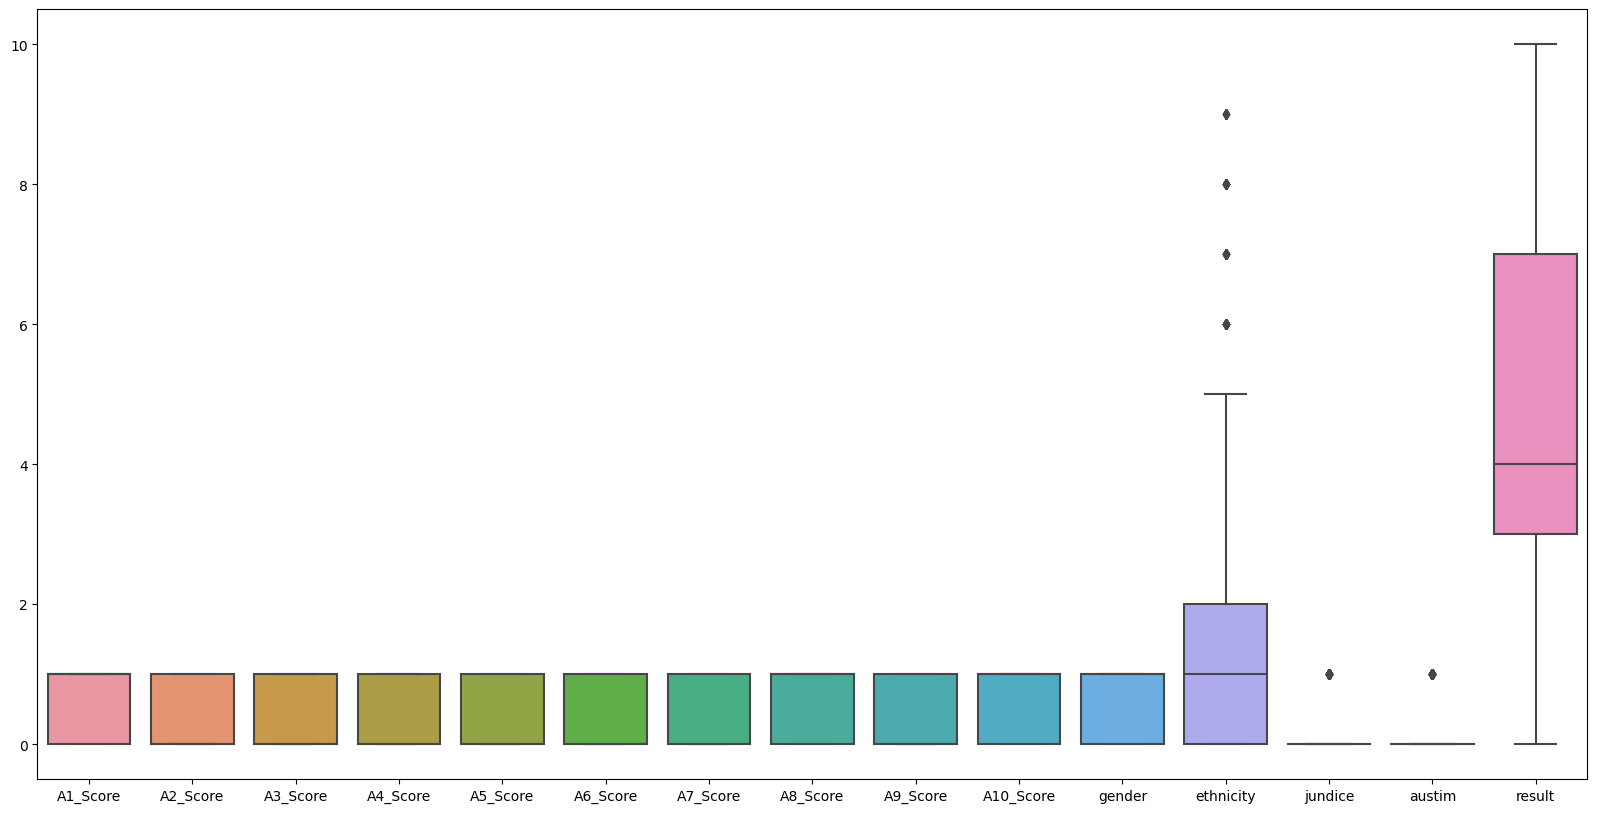

In [80]:
# Checking is there are outliers or not
import seaborn as sns
plt.figure(figsize=(20,10))
sns.boxplot(dataset)
plt.show()
# As there are few outliers I've ignored them

In [81]:
dataset['Class/ASD'] = lb.fit_transform(dataset['Class/ASD'])
# cutting the dataset into independent and dependent features

In [82]:
dataset['Class/ASD'].value_counts()   # the dataset is imbalanced

0    515
1    189
Name: Class/ASD, dtype: int64

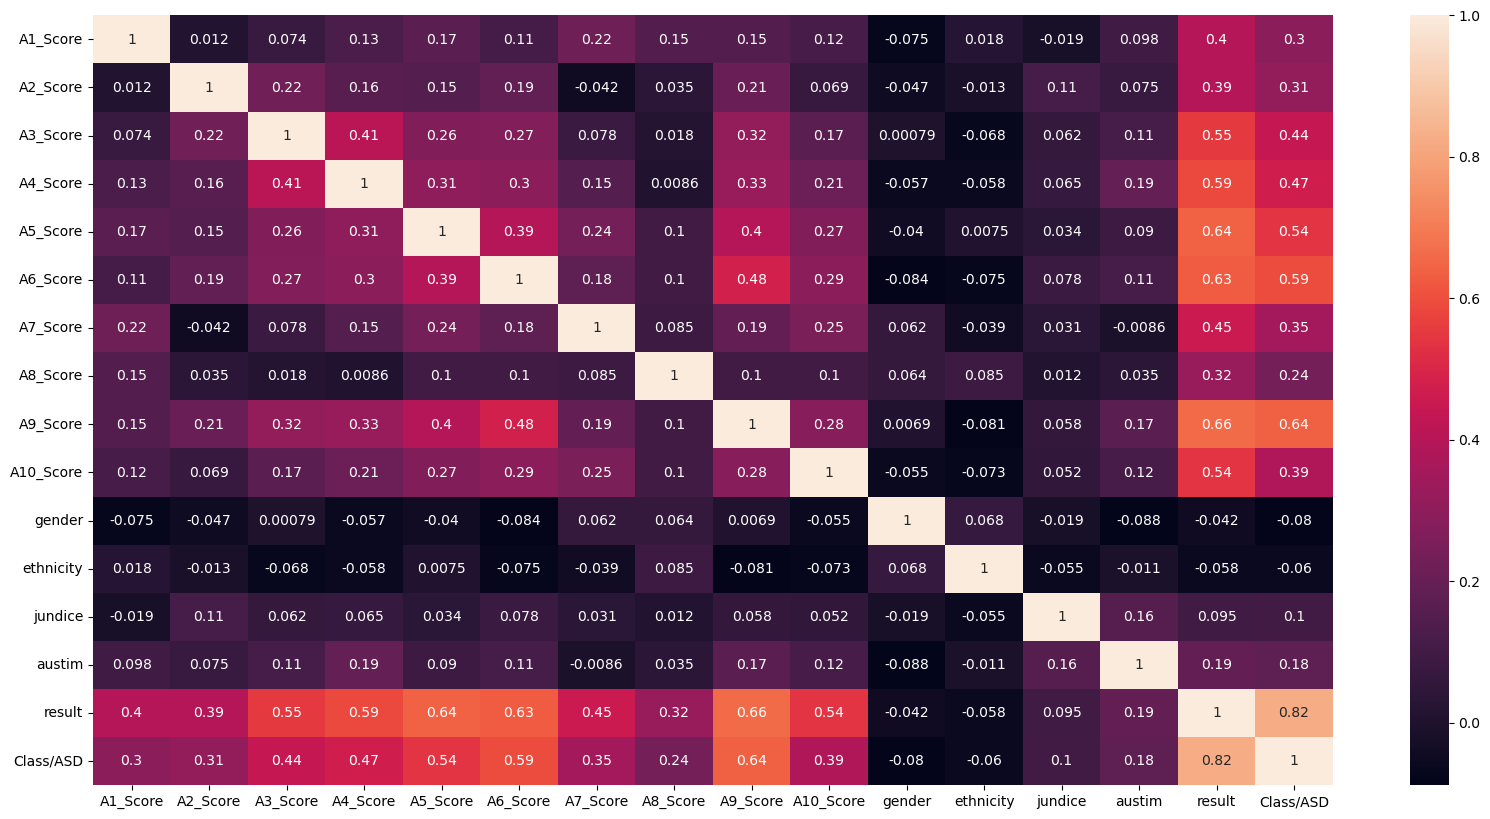

In [83]:
correlation = dataset.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True)
plt.show()

In [84]:
def correlation(dataset,threshold):
    corr = dataset.corr()
    fans = set()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j]) > threshold:
                col_name = corr.columns[i]
                fans.add(col_name)
    return fans

In [85]:
correlation(dataset, 0.7)
# Now I found out that no columns are highly correlated so we'll simply take all the columns that are now available in 
# the dataset

{'Class/ASD'}

In [87]:
x = dataset.iloc[:,:15].values
y = dataset.iloc[:,15].values

In [88]:
# Splitting the data into train and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

# Cross Validation

In [90]:
# Now Model Selection
# I cannot Use Linear Regression (logistic regression) as no linear relation between features is found
# I cannot Use KNN as it dont perform well on the imbalanced dataset
# I'll put SVM, Random Forest in the Cross-Validation and select the best
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
models = [SVC(C= 10, kernel='rbf', gamma='scale',random_state=None), 
          RandomForestClassifier(n_estimators=50, criterion='gini')]
for model in models:
    cvs = cross_val_score(model,x_train,y_train,cv=10)
    print(cvs)
    avg_cvs = sum(cvs)/len(cvs)
    print(f"Average cross_val_score of {model} is {avg_cvs}")

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average cross_val_score of SVC(C=10) is 1.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average cross_val_score of RandomForestClassifier(n_estimators=50) is 1.0


In [92]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A1_Score   704 non-null    int64  
 1   A2_Score   704 non-null    int64  
 2   A3_Score   704 non-null    int64  
 3   A4_Score   704 non-null    int64  
 4   A5_Score   704 non-null    int64  
 5   A6_Score   704 non-null    int64  
 6   A7_Score   704 non-null    int64  
 7   A8_Score   704 non-null    int64  
 8   A9_Score   704 non-null    int64  
 9   A10_Score  704 non-null    int64  
 10  gender     704 non-null    int32  
 11  ethnicity  704 non-null    float64
 12  jundice    704 non-null    int32  
 13  austim     704 non-null    int32  
 14  result     704 non-null    int64  
 15  Class/ASD  704 non-null    int32  
dtypes: float64(1), int32(4), int64(11)
memory usage: 77.1 KB


# Hyper Parameter Tunning

In [93]:
from sklearn.svm import SVC
classifier = SVC()
parameters = [{'C':[1,10,100,2,5],
             'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'gamma': ['scale']}]
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy')
gs.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 2, 5], 'gamma': ['scale'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             scoring='accuracy')

In [94]:
gs.best_score_

1.0

In [97]:
gs.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [98]:
# I'll select SVM over RadomForest though it doesnt matter both gave same cross val score
# but SVM will do better as it works well on the high dimensional dataset

classifier = SVC(C=1, kernel='linear', gamma='scale')
classifier.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [100]:
y_pred = classifier.predict(x_test)

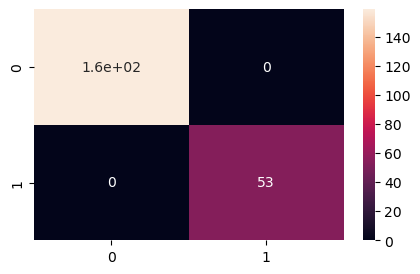

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True)
plt.show()

In [107]:
print(accuracy_score(y_test, y_pred))

1.0
